This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

2025-04-28 18:17:04.345714: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 18:17:04.427970: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 18:17:04.506561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745882224.582763  188132 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745882224.604315  188132 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745882224.778118  188132 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a simple model
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Fit with white noise features
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# Fit with zero channels
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2025-04-28 18:17:54.623263: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6912 - loss: 1.1249 - val_accuracy: 0.9280 - val_loss: 0.2496
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9121 - loss: 0.2835 - val_accuracy: 0.9390 - val_loss: 0.2036
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9459 - loss: 0.1765 - val_accuracy: 0.9513 - val_loss: 0.1640
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9632 - loss: 0.1217 - val_accuracy: 0.9494 - val_loss: 0.1638
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9730 - loss: 0.0889 - val_accuracy: 0.9552 - val_loss: 0.1494
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9805 - loss: 0.0646 - val_accuracy: 0.9665 - val_loss: 0.1150
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9849 - loss: 0.0481 - val_accuracy: 0.9418 - val_loss: 0.2012
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accu

**Plotting a validation accuracy comparison**

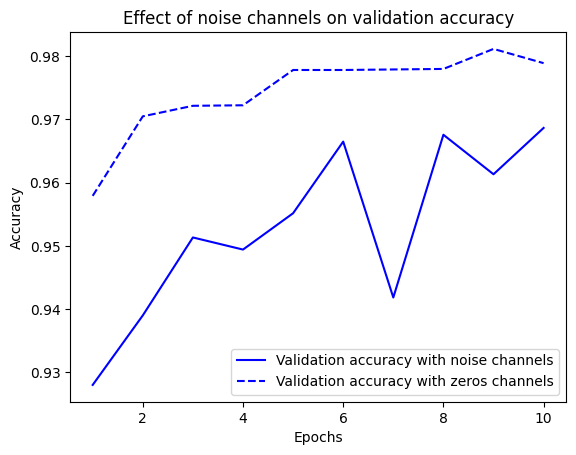

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1018 - loss: 2.3307 - val_accuracy: 0.1039 - val_loss: 2.3060
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1214 - loss: 2.2977 - val_accuracy: 0.1073 - val_loss: 2.3109
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1284 - loss: 2.2882 - val_accuracy: 0.0973 - val_loss: 2.3166
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1459 - loss: 2.2746 - val_accuracy: 0.1018 - val_loss: 2.3338
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1557 - loss: 2.2586 - val_accuracy: 0.0981 - val_loss: 2.3401
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1720 - loss: 2.2354 - val_accuracy: 0.1028 - val_loss: 2.3525
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1893 - loss: 2.2128 - val_accuracy: 0.0983 - val_loss: 2.3705
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2046 - loss: 2.1846 - 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4021 - loss: 2470.7512 - val_accuracy: 0.2580 - val_loss: 2.5402
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1829 - loss: 3.1323 - val_accuracy: 0.2383 - val_loss: 2.3277
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1914 - loss: 2.3902 - val_accuracy: 0.1830 - val_loss: 2.3123
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2079 - loss: 2.5537 - val_accuracy: 0.1898 - val_loss: 2.2867
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1739 - loss: 2.4333 - val_accuracy: 0.1732 - val_loss: 2.3249
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2070 - loss: 2.5322 - val_accuracy: 0.1442 - val_loss: 2.4754
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1829 - loss: 2.3605 - val_accuracy: 0.2471 - val_loss: 2.1816
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2341 - loss: 2.3403 - val_a

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8390 - loss: 0.8012 - val_accuracy: 0.9437 - val_loss: 0.1882
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9620 - loss: 0.1287 - val_accuracy: 0.9583 - val_loss: 0.1607
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9753 - loss: 0.0902 - val_accuracy: 0.9655 - val_loss: 0.1460
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9806 - loss: 0.0704 - val_accuracy: 0.9683 - val_loss: 0.1570
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9842 - loss: 0.0583 - val_accuracy: 0.9732 - val_loss: 0.1616
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9864 - loss: 0.0490 - val_accuracy: 0.9687 - val_loss: 0.1930
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9884 - loss: 0.0480 - val_accuracy: 0.9697 - val_loss: 0.1990
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9905 - loss: 0.0384 - val_accu

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7339 - loss: 1.0593 - val_accuracy: 0.9020 - val_loss: 0.3607
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8994 - loss: 0.3646 - val_accuracy: 0.9150 - val_loss: 0.3107
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9142 - loss: 0.3169 - val_accuracy: 0.9194 - val_loss: 0.2933
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9157 - loss: 0.3038 - val_accuracy: 0.9222 - val_loss: 0.2844
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9185 - loss: 0.2934 - val_accuracy: 0.9233 - val_loss: 0.2790
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9213 - loss: 0.2814 - val_accuracy: 0.9262 - val_loss: 0.2741
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9208 - loss: 0.2847 - val_accuracy: 0.9256 - val_loss: 0.2722
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9248 - loss: 0.2722 - val_accuracy: 0.

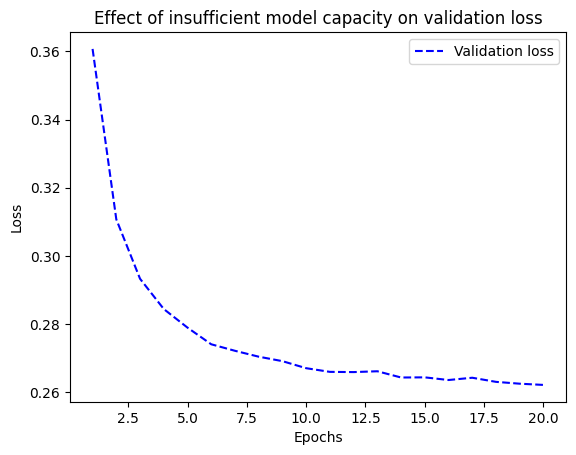

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
- There is not enough representational power in the model
- It should always be possible to overfit
- The model needs to be bigger, store more info
- 

In [9]:
# Bigger model with hidden layers
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8324 - loss: 0.6029 - val_accuracy: 0.9427 - val_loss: 0.2018
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9464 - loss: 0.1788 - val_accuracy: 0.9589 - val_loss: 0.1407
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9661 - loss: 0.1159 - val_accuracy: 0.9649 - val_loss: 0.1192
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9747 - loss: 0.0843 - val_accuracy: 0.9703 - val_loss: 0.1019
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9799 - loss: 0.0670 - val_accuracy: 0.9724 - val_loss: 0.0987
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9833 - loss: 0.0552 - val_accuracy: 0.9726 - val_loss: 0.0967
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.9734 - val_loss: 0.0972
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.

## Improving generalization

### Dataset curation

- Spending more money on data curation almost always yields more return than
  spending on a better model
    - Make sure you have enough data (dense sampling across the input space)
    - Minimize labeling errors
    - Clean data and deal with missing values
    - If you have many features and you don't know which are important, do
      feature selection

### Feature engineering

Feature engineering is using your own knowledge to hardcode transformation into
the data. It is a matter of encoding how humans do it to get to the answer faster.
It makes the problem simpler by expressing it in an easy way.

Deep learning aleviates some of the need for feature engineering. This used to
be a very critical piece of the overall workflow. Deep learning extracts useful,
but not necessarily interpretable features from the data

Note:
- Good features let you solve things more elegantly. It just makes sense for
  certain applications
- Good features let you solve problems with far less data

### Using early stopping

- In deep learning the models are vastly overparameterized
- Overparameterization is not an issue because you never fully fit the model

Early stopping is the process of stopping the model when the validation metrics
have stopped improving and remembering the best model.

### Regularizing your model

Regularization are the set of techniques that actively impede the model from
perfectly fitting the training data to help it do better in validation.

#### Reducing the network's size

The easiest way to reduce overfitting is to reduce the model size, i.e. the
number of trainable parameters. If your model does not have the resources to
memorize the model it will not overfit.

However, there is no magical formula to find the right number of layers, etc. Smaller
models start overfitting later.

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2025-04-28 19:25:25.817329: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6943 - loss: 0.6144 - val_accuracy: 0.8574 - val_loss: 0.4458
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8811 - loss: 0.3854 - val_accuracy: 0.8806 - val_loss: 0.3339
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9129 - loss: 0.2789 - val_accuracy: 0.8357 - val_loss: 0.3786
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9283 - loss: 0.2211 - val_accuracy: 0.8924 - val_loss: 0.2796
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9484 - loss: 0.1759 - val_accuracy: 0.8717 - val_loss: 0.3146
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9526 - loss: 0.1508 - val_accuracy: 0.8893 - val_loss: 0.2806
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9642 - loss: 0.1294 - val_accuracy: 0.8870 - val_loss: 0.2933
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9720 - loss: 0.1115 - val_accuracy: 0.8698 - val_loss: 0.

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2025-04-28 19:26:06.363058: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6475 - loss: 0.6652 - val_accuracy: 0.8251 - val_loss: 0.5850
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8431 - loss: 0.5577 - val_accuracy: 0.8457 - val_loss: 0.4954
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8700 - loss: 0.4595 - val_accuracy: 0.8664 - val_loss: 0.4225
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8885 - loss: 0.3804 - val_accuracy: 0.8741 - val_loss: 0.3717
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9034 - loss: 0.3244 - val_accuracy: 0.8790 - val_loss: 0.3340
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9135 - loss: 0.2807 - val_accuracy: 0.8805 - val_loss: 0.3117
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9230 - loss: 0.2452 - val_accuracy: 0.8873 - val_loss: 0.2927
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9335 - loss: 0.2165 - val_accuracy: 0.8910 - val_loss: 0.

**Version of the model with higher capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2025-04-28 19:26:33.541267: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.6472 - loss: 0.6505 - val_accuracy: 0.7346 - val_loss: 0.5389
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.8500 - loss: 0.3579 - val_accuracy: 0.8716 - val_loss: 0.3033
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9038 - loss: 0.2449 - val_accuracy: 0.8192 - val_loss: 0.4415
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9160 - loss: 0.2049 - val_accuracy: 0.8869 - val_loss: 0.2782
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9518 - loss: 0.1307 - val_accuracy: 0.8884 - val_loss: 0.2912
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9682 - loss: 0.0946 - val_accuracy: 0.8827 - val_loss: 0.3306
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9773 - loss: 0.0769 - val_accuracy: 0.8839 - val_loss: 0.3501
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.9863 - loss: 0.0508 - val_accuracy: 0.8844 - val_

#### Adding weight regularization

**Adding L2 weight regularization to the model**

- Parsimony is preferable

##### Weight Regularization

- Force weights to only take small values
- This is done by adding a cost to the loss function for having big weights
    - L1 Regularization - The cost added is proportional to the _absolute value
      of the weight coeffient_
    - L2 Regularization - The cost is proportional to the square of the value
      of the weight coefficints.

In Keras, this is done by passing a weight regularizer instance to layers as
a keyword argument. 

- Note that this penalty to the loss is only added at training time, so the loss
  is higher at training time than at validation time.
- You can use l1 or l2, or both simultaneously

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2025-04-28 19:36:16.493886: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6600 - loss: 0.7116 - val_accuracy: 0.8648 - val_loss: 0.5080
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8878 - loss: 0.4495 - val_accuracy: 0.8810 - val_loss: 0.4051
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9125 - loss: 0.3510 - val_accuracy: 0.8864 - val_loss: 0.3733
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9281 - loss: 0.3020 - val_accuracy: 0.8737 - val_loss: 0.3844
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9358 - loss: 0.2765 - val_accuracy: 0.8886 - val_loss: 0.3575
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9445 - loss: 0.2566 - val_accuracy: 0.8814 - val_loss: 0.3700
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9509 - loss: 0.2401 - val_accuracy: 0.8853 - val_loss: 0.3616
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9538 - loss: 0.2332 - val_accuracy: 0.8837 - val_loss: 0.

**Different weight regularizers available in Keras**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

Dropout can be applied to a layer. It is randomly dropping out a number of output
features of a layer during training. The dropout rate is a fraction of the features
that are dropped. 

In Keras, dropout is implemented with a dropout layer. 

**Adding dropout to the IMDB model**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2025-04-28 19:42:09.487572: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5948 - loss: 0.6662 - val_accuracy: 0.8436 - val_loss: 0.5487
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7437 - loss: 0.5573 - val_accuracy: 0.8581 - val_loss: 0.4516
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7994 - loss: 0.4812 - val_accuracy: 0.8761 - val_loss: 0.3854
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8330 - loss: 0.4211 - val_accuracy: 0.8819 - val_loss: 0.3337
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8724 - loss: 0.3537 - val_accuracy: 0.8872 - val_loss: 0.2971
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8797 - loss: 0.3243 - val_accuracy: 0.8918 - val_loss: 0.2806
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8988 - loss: 0.2830 - val_accuracy: 0.8867 - val_loss: 0.2842
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9182 - loss: 0.2461 - val_accuracy: 0.8921 - val_loss: 0.

## Summary

### Maximize Generalization

- Get more training data, or better training data
- Develop better features
- Reduce the capacity of the model
- Add weight regularization
- Add dropout

### Notes

- The purpose of machine learning is to generalize
- Deep learning achieves this by learning to interpolate between samples. It 
  learns the latent manifold of the training data. This is why it can only
  make sense of things that are close in space.
- There is a tension between optimization and generalization
- You must evaluate the generalization power of your model. This can be done with 
  simple holdout validation, kfold and interated kfold, etc. Always use a train,
  validation, and test set appropriatly
- Always start by overfitting your model and then regularizing it.
- 